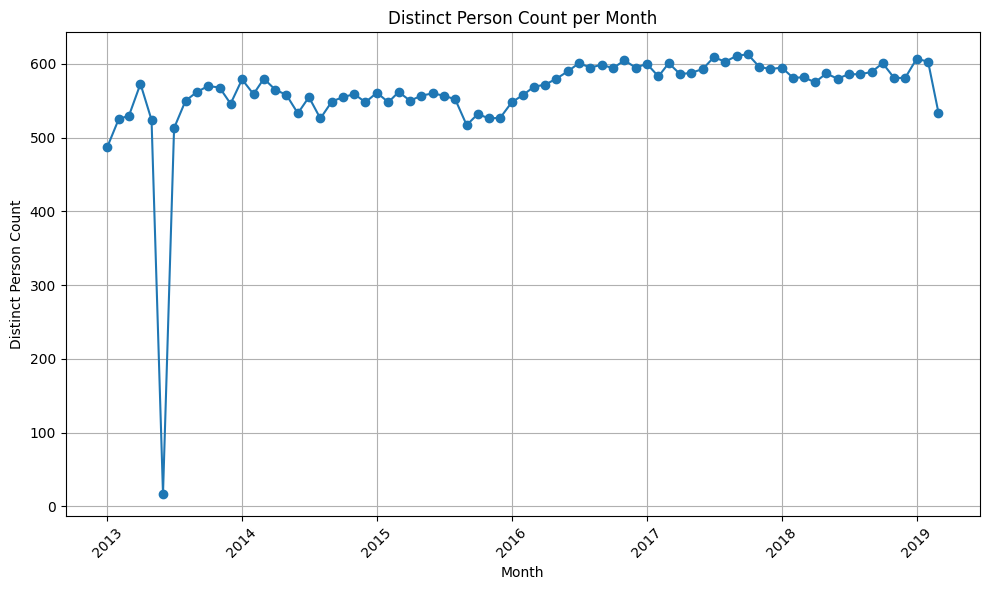

In [4]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd

# Connect to your SQLite database
connection = sqlite3.connect("c:/ftp/roger/roger.db")

# SQL query to get the distinct person count per month
query = """
SELECT
    strftime('%Y-%m', Datalaikas) AS year_month,
    COUNT(DISTINCT person) AS person_count
FROM
    judejimai
WHERE
    "Įvykio kodas" = 1
GROUP BY
    year_month;
"""

# Read the data into a DataFrame
df_people = pd.read_sql_query(query, connection)

# Close the database connection
connection.close()

# Convert the 'year_month' to datetime format for plotting
df_people["year_month"] = pd.to_datetime(df_people["year_month"])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_people["year_month"], df_people["person_count"], marker="o")
plt.title("Distinct Person Count per Month")
plt.xlabel("Month")
plt.ylabel("Distinct Person Count")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
